In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [2]:
qbs = pd.read_csv('../Capstone_csv_file/qbs_td_salary_17-18')

In [3]:
qbs.dtypes

NAME        object
TD           int64
TD_rank    float64
salary       int64
dtype: object

In [4]:
qbs.head()

,NAME,TD,TD_rank,salary
0,Russell Wilson,34,1.0,21900000
1,Carson Wentz,33,2.0,6669085
2,Tom Brady,32,3.0,20500000
3,Matthew Stafford,29,4.0,27000000
4,Jared Goff,28,6.0,6984418


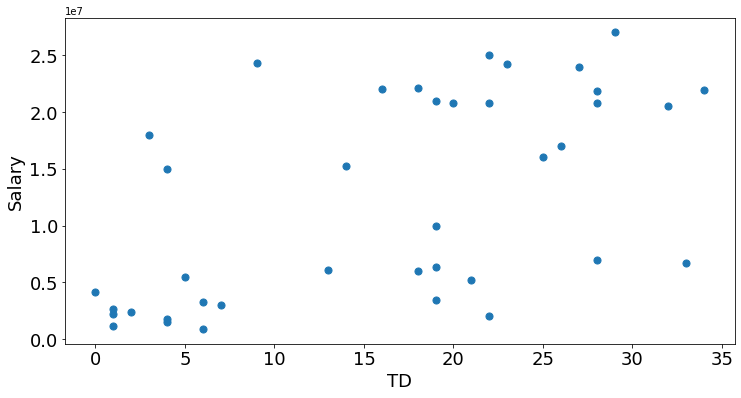

In [5]:
ax = qbs.plot(kind="scatter", x = 'TD',  y = 'salary', figsize = (12,6), s = 50)
plt.xlabel('TD', fontsize=18)
plt.ylabel("Salary", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [6]:
ss = StandardScaler()
X = ss.fit_transform(qbs.loc[:, ['TD', 'salary']])

In [7]:
X.mean(axis = 0)

array([ 1.70803542e-17, -3.98541599e-17])

In [8]:
X.std(axis = 0)

array([1., 1.])

In [9]:
km = KMeans(n_clusters = 5, random_state = 27)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=27, tol=0.0001, verbose=0)

In [10]:
km.cluster_centers_

array([[-1.22673774, -1.08862836],
       [ 0.37531665,  1.12348147],
       [ 0.50371445, -0.7211662 ],
       [-0.82841274,  0.66052516],
       [ 1.20588993,  0.99486711]])

In [11]:
km.predict(X)

array([4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2,
       1, 3, 2, 3, 0, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0], dtype=int32)

In [12]:
qbs['clusters'] = km.labels_
qbs.head()

,NAME,TD,TD_rank,salary,clusters
0,Russell Wilson,34,1.0,21900000,4
1,Carson Wentz,33,2.0,6669085,2
2,Tom Brady,32,3.0,20500000,4
3,Matthew Stafford,29,4.0,27000000,4
4,Jared Goff,28,6.0,6984418,2


In [13]:
ss.inverse_transform(km.cluster_centers_)

array([[3.36363636e+00, 2.58191009e+06],
       [2.00000000e+01, 2.22704761e+07],
       [2.13333333e+01, 5.85245433e+06],
       [7.50000000e+00, 1.81500000e+07],
       [2.86250000e+01, 2.11257625e+07]])

In [14]:
qbs.groupby('clusters')[['TD', 'salary']].mean()

,TD,salary
clusters,,
0,3.363636,2.581910e+06
1,20.000000,2.227048e+07
2,21.333333,5.852454e+06
3,7.500000,1.815000e+07
4,28.625000,2.112576e+07


In [15]:
centroids = qbs.groupby('clusters')[['TD', 'salary']].mean()

<Figure size 504x504 with 0 Axes>

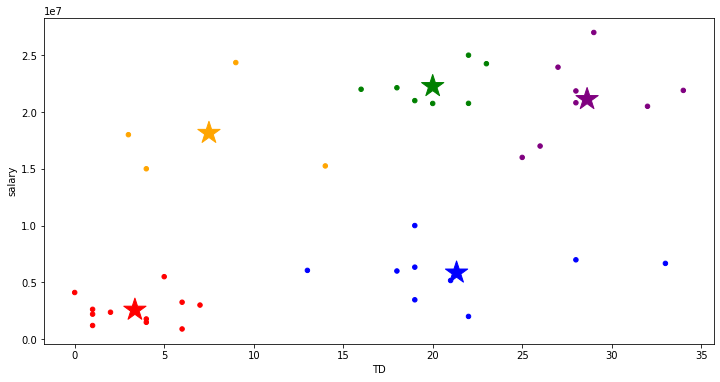

In [16]:
plt.figure(figsize = (7,7));

colors = ['red', 'green', 'blue', 'orange', 'purple']
qbs['color'] = qbs['clusters'].map(lambda p: colors[p])

ax = qbs.plot(    
    kind = 'scatter', 
    x = 'TD', y = 'salary',
    figsize = (12,6),
    c = qbs['color']
);

centroids.plot(
    kind = 'scatter', 
    x = 'TD', y = 'salary', 
    marker = '*', c = colors, s = 550,
    ax = ax
);

In [17]:
km.inertia_

7.582544940889574

In [18]:
silhouette_score(X, km.labels_)

0.522276859984146